In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, roc_auc_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
from sklearn.utils import shuffle
from paramOptimizer import hyperParameterOptimizer

if __name__ == "__main__":
    # Read CSV file that our SQL Query Generated as a pandas DataFrame
    df = pd.read_csv("CSV/A-0.csv")
    # Adding 'nominated' column to the dataFrame
    df['nominated'] = df.apply(lambda row: True if row['inducted'] in ['Y', 'N'] else False, axis=1)
    # Shuffling Data
    df = shuffle(df, random_state=42)
    # Filling the 'NaN' values with 0
    df = df.fillna(0)

    # Create train and test data
    train_features = ['B_G', 'B_AB', 'B_R', 'B_H', 'B_HR', 'B_RBI', 'B_SB', 'B_SO',
                    'PI_W', 'PI_L', 'PI_G', 'PI_CG', 'PI_SV', 'PI_H', 
                        'PI_ER', 'PI_HR', 'PI_BB', 'PI_SO', 'PI_ERA', 'PI_R',
                    'FI_G', 'FI_GS', 'FI_InnOuts', 'FI_A', 'FI_E', 'FI_DP',
                    'ASF_NUM_YEARS', 'MAX_SAL', 'MAX_SAL_YEAR']

    df_X = df[train_features]
    df_y = df['nominated']
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
    
    clf_data = hyperParameterOptimizer(X_train, X_test, y_train, y_test)
    

In [104]:
import matplotlib.pyplot as plt

In [120]:
clf_data = pd.read_csv("CSV/taskBParamOptimizerResults.csv")

In [125]:
clf_data[clf_data["max_depth"] == 4].sort_values("AUC_ROC", ascending = False).head(20)

,Unnamed: 0,max_depth,min_samples_split,min_samples_leaf,Accuracy,AUC_ROC
432,432,4.0,2.0,1.0,0.843750,0.815630
433,433,4.0,2.0,3.0,0.839844,0.812998
434,434,4.0,2.0,5.0,0.839844,0.812998
435,435,4.0,2.0,7.0,0.835938,0.805423
436,436,4.0,2.0,9.0,0.835938,0.805423
437,437,4.0,2.0,11.0,0.839844,0.817943
438,438,4.0,2.0,13.0,0.839844,0.817943
439,439,4.0,2.0,15.0,0.839844,0.817943
440,440,4.0,2.0,17.0,0.839844,0.817943
441,441,4.0,2.0,19.0,0.859375,0.831100


In [123]:
clf_data.sort_values("AUC_ROC", ascending = False).head(20)

,Unnamed: 0,max_depth,min_samples_split,min_samples_leaf,Accuracy,AUC_ROC
1369,1369,10.0,14.0,3.0,0.843750,0.845295
2182,2182,16.0,4.0,21.0,0.855469,0.843301
1942,1942,14.0,12.0,21.0,0.855469,0.843301
2122,2122,15.0,18.0,21.0,0.855469,0.843301
2110,2110,15.0,16.0,21.0,0.855469,0.843301
1366,1366,10.0,12.0,21.0,0.855469,0.843301
2098,2098,15.0,14.0,21.0,0.855469,0.843301
2086,2086,15.0,12.0,21.0,0.855469,0.843301
2074,2074,15.0,10.0,21.0,0.855469,0.843301
2062,2062,15.0,8.0,21.0,0.855469,0.843301


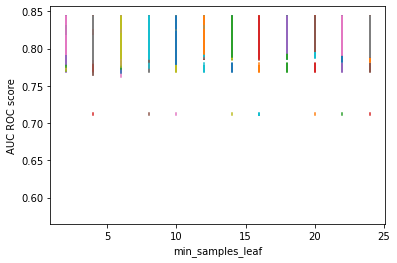

In [119]:

max_depth_options = range(1, 20, 1)
min_samples_split_range = range(2, 25, 2)
min_samples_leaf_range = range(1, 25, 2)

for max_depth in max_depth_options:
    for min_samples_split in min_samples_split_range:
        data = clf_data.loc[(clf_data["min_samples_split"] == min_samples_split) & (clf_data["max_depth"] == max_depth)]
        plt.plot(data["min_samples_split"], data["AUC_ROC"], label=f"split = {min_samples_split}, leaf = {max_depth}")

plt.xlabel("min_samples_leaf")
plt.ylabel("AUC ROC score")
plt.show()


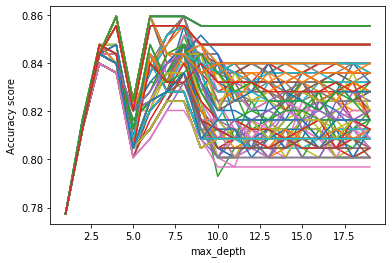

In [117]:
min_samples_split_range = range(2, 25, 2)
min_samples_leaf_range = range(1, 25, 2)

for min_samples_split in min_samples_split_range:
    for min_samples_leaf in min_samples_leaf_range:
        data = clf_data.loc[(clf_data["min_samples_split"] == min_samples_split) & (clf_data["min_samples_leaf"] == min_samples_leaf)]
        plt.plot(data["max_depth"], data["Accuracy"], label=f"split = {min_samples_split}, leaf = {min_samples_leaf}")

plt.xlabel("max_depth")
plt.ylabel("A score")
plt.show()

In [114]:
optimal_depth = clf_data[clf_data["max_depth"] == 4]
optimal_depth.sort_values("AUC_ROC", ascending = False)

,Unnamed: 0,max_depth,min_samples_split,min_samples_leaf,Accuracy,AUC_ROC
525,525,4.0,16.0,19.0,0.859375,0.831100
465,465,4.0,6.0,19.0,0.859375,0.831100
477,477,4.0,8.0,19.0,0.859375,0.831100
453,453,4.0,4.0,19.0,0.859375,0.831100
549,549,4.0,20.0,19.0,0.859375,0.831100
...,...,...,...,...,...,...
495,495,4.0,12.0,7.0,0.835938,0.805423
448,448,4.0,4.0,9.0,0.835938,0.805423
447,447,4.0,4.0,7.0,0.835938,0.805423
507,507,4.0,14.0,7.0,0.835938,0.805423


In [102]:
clf_data_manually_balanced = pd.read_csv("CSV/paramOptimizerBalancedManually.csv")
clf_data_manually_balanced.sort_values("AUC_ROC", ascending = False).head(20)

,Unnamed: 0,max_depth,min_samples_split,min_samples_leaf,Accuracy,AUC_ROC
806,806,6.0,16.0,5.0,0.924419,0.925248
770,770,6.0,10.0,5.0,0.924419,0.925248
818,818,6.0,18.0,5.0,0.924419,0.925248
794,794,6.0,14.0,5.0,0.924419,0.925248
830,830,6.0,20.0,5.0,0.924419,0.925248
807,807,6.0,16.0,7.0,0.924419,0.925128
735,735,6.0,4.0,7.0,0.924419,0.925128
723,723,6.0,2.0,7.0,0.924419,0.925128
771,771,6.0,10.0,7.0,0.924419,0.925128
819,819,6.0,18.0,7.0,0.924419,0.925128
